<a href="https://colab.research.google.com/github/matthewhasman/ML-on-Microcontrollers/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install hub to pull dataset

In [3]:
import string
import random
from random import randint
import cv2
import re
import numpy as np
import os
import math
from PIL import Image, ImageFont, ImageDraw
from matplotlib import pyplot as plt
from collections import Counter

from scipy.io import wavfile
from IPython.display import Audio, Image
from IPython.core.display import HTML

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, Image
from IPython.core.display import HTML

In [4]:
!pip install hub

In [5]:
import hub
ds = hub.load("hub://activeloop/spoken_mnist")

-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/spoken_mnist



-

hub://activeloop/spoken_mnist loaded successfully.



# Training w tensorflow

In [6]:
!apt install subversion
!svn checkout https://github.com/Jakobovski/free-spoken-digit-dataset/trunk/recordings;

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 6 not upgraded.
Need to get 2,672 kB of archives.
After this operation, 10.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libapr1 amd64 1.7.0-8ubuntu0.22.04.1 [108 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libaprutil1 amd64 1.6.1-5ubuntu4.22.04.2 [92.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libserf-1-1 amd64 1.3.9-10ubuntu2 [50.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libutf8proc2 amd64 2.7.0-3 [73.9 kB]
Get:5 http://archive.u

In [15]:
PATH = "./recordings/"
def files_in_folder(folder_path):
  '''
  Returns a list of strings where each entry is a file in the folder_path.

  Parameters
  ----------

  folder_path : str
     A string to folder for which the file listing is returned.

  '''
  files_A = !ls "{folder_path}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.

  # Split the string listing sets of 4 files by tab and space and remove any
  # empty splits.
  files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]

  # Concatenate all splits into a single sorted list
  files_C = []
  for element in files_B:
    files_C = files_C + element
  files_C.sort()

  return files_C

folder0 = PATH

files0 = files_in_folder(folder0)


In [64]:
input_audio = wavfile.read(PATH + files0[0])

# The result of importing a wavfile should be a tuple of two elements:
# the sample rate, and the audio signal, which may be have multiple channels.
sample_rate = input_audio[0]

# My audio sample had multiple channels. Yours may not.
# In my case, I took just one of these channels, and converted it from integer values to floats.

audio = np.array(input_audio[1], dtype=np.int16) / np.max(input_audio[1])
Audio(audio, rate=sample_rate)

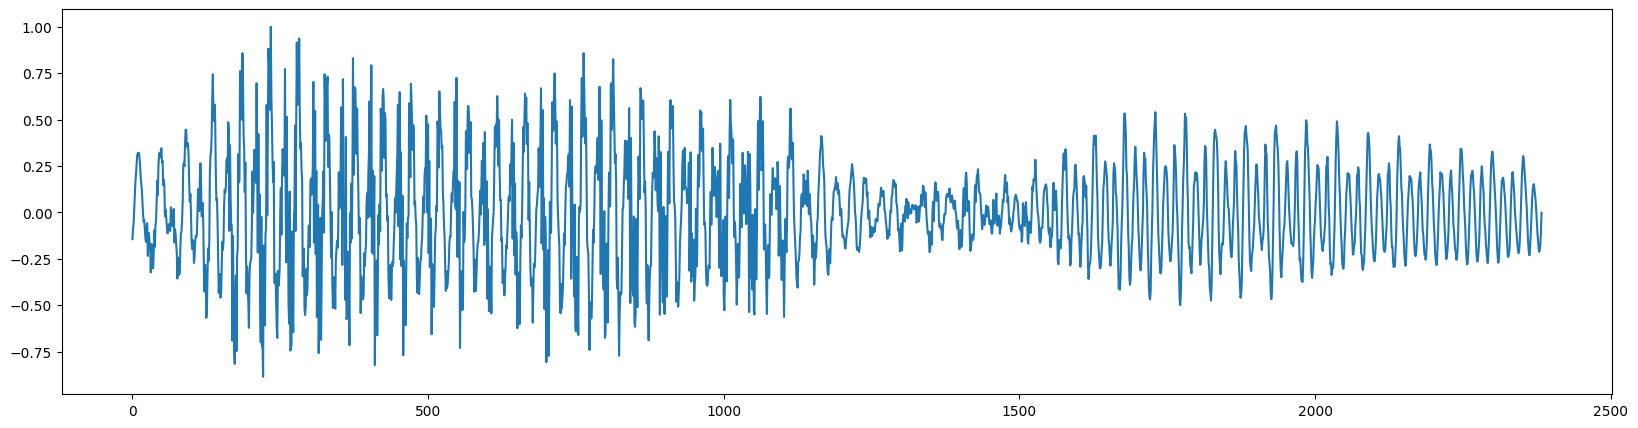

In [65]:
plt.figure(figsize=(20, 5))
plt.plot(audio)

In [66]:
fourier_coefficients = np.fft.rfft(audio, norm="forward")
frequency_spectrum =  np.fft.rfftfreq(len(audio), 1 / sample_rate)

In [68]:
# In telephony, the usable voice frequency band ranges from approximately 300 to 3400 Hz.

Text(0.5, 0, 'Frequency (Hz)')

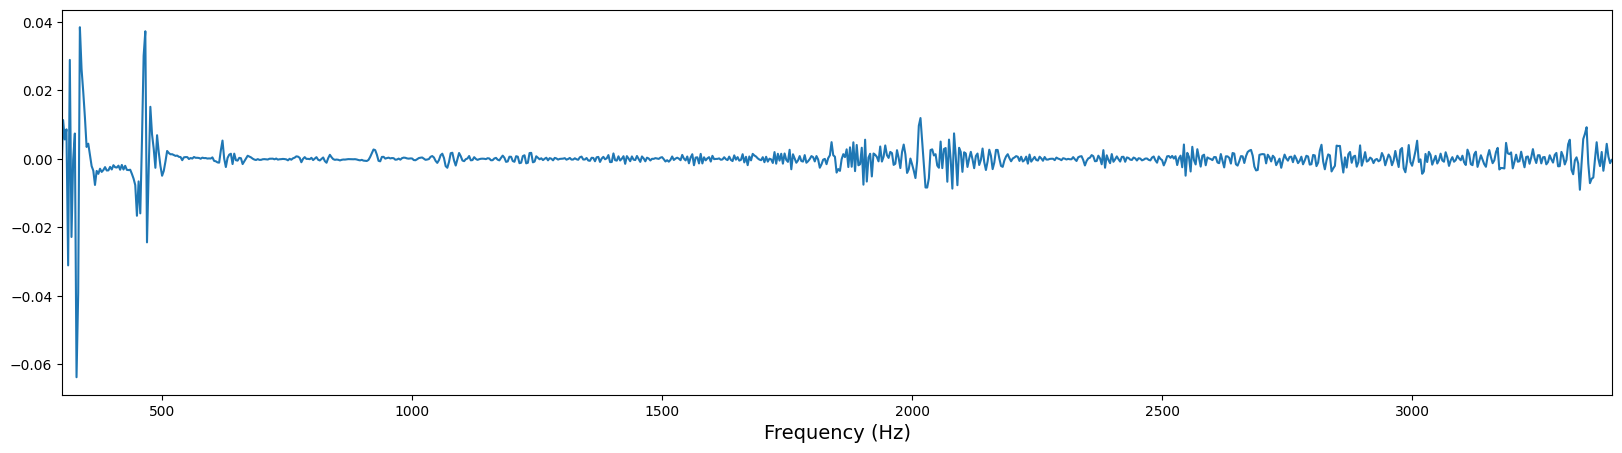

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(frequency_spectrum, fourier_coefficients.real)
plt.xlim(300, 3400)
plt.xlabel("Frequency (Hz)", fontsize=14)